In [1]:
# 📦 Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')


In [2]:
# 📂 Load the dataset
# 👇 Replace 'your_file.csv' with your actual file path
df = pd.read_csv('../data/mup_dme_ry25_p05_v10_dy22_rfrr.csv', low_memory=False)
df.shape


(385637, 97)

In [3]:
# 🔍 Preview column names
df.columns.tolist()


['Rfrg_NPI',
 'Rfrg_Prvdr_Last_Name_Org',
 'Rfrg_Prvdr_First_Name',
 'Rfrg_Prvdr_MI',
 'Rfrg_Prvdr_Crdntls',
 'Rfrg_Prvdr_Ent_Cd',
 'Rfrg_Prvdr_St1',
 'Rfrg_Prvdr_St2',
 'Rfrg_Prvdr_City',
 'Rfrg_Prvdr_State_Abrvtn',
 'Rfrg_Prvdr_State_FIPS',
 'Rfrg_Prvdr_Zip5',
 'Rfrg_Prvdr_RUCA',
 'Rfrg_Prvdr_RUCA_Desc',
 'Rfrg_Prvdr_Cntry',
 'Rfrg_Prvdr_Spclty_Desc',
 'Rfrg_Prvdr_Spclty_Srce',
 'Tot_Suplrs',
 'Tot_Suplr_HCPCS_Cds',
 'Tot_Suplr_Benes',
 'Tot_Suplr_Clms',
 'Tot_Suplr_Srvcs',
 'Suplr_Sbmtd_Chrgs',
 'Suplr_Mdcr_Alowd_Amt',
 'Suplr_Mdcr_Pymt_Amt',
 'Suplr_Mdcr_Stdzd_Pymt_Amt',
 'DME_Sprsn_Ind',
 'DME_Tot_Suplrs',
 'DME_Tot_Suplr_HCPCS_Cds',
 'DME_Tot_Suplr_Benes',
 'DME_Tot_Suplr_Clms',
 'DME_Tot_Suplr_Srvcs',
 'DME_Suplr_Sbmtd_Chrgs',
 'DME_Suplr_Mdcr_Alowd_Amt',
 'DME_Suplr_Mdcr_Pymt_Amt',
 'DME_Suplr_Mdcr_Stdzd_Pymt_Amt',
 'POS_Sprsn_Ind',
 'POS_Tot_Suplrs',
 'POS_Tot_Suplr_HCPCS_Cds',
 'POS_Tot_Suplr_Benes',
 'POS_Tot_Suplr_Clms',
 'POS_Tot_Suplr_Srvcs',
 'POS_Suplr_Sbmtd_Chrgs',
 'P

In [4]:
# 🧹 Select relevant columns
cols = [
    'Rfrg_Prvdr_State_Abrvtn',
    'Rfrg_Prvdr_Spclty_Desc',
    'DME_Tot_Suplr_Clms',
    'Bene_CC_PH_COPD_V2_Pct'
]
df = df[cols].dropna()
df = df[df['DME_Tot_Suplr_Clms'] > 0]
df.head()


,Rfrg_Prvdr_State_Abrvtn,Rfrg_Prvdr_Spclty_Desc,DME_Tot_Suplr_Clms,Bene_CC_PH_COPD_V2_Pct
15,CO,Pulmonary Disease,462.0,0.460674
29,OR,Pulmonary Disease,218.0,0.758621
36,SC,Physician Assistant,981.0,0.137097
39,FL,Family Practice,76.0,0.478261
40,TX,Physical Medicine and Rehabilitation,426.0,0.313725


In [5]:
# 🔁 Simulate filter usage (1 claim = 1 filter, weighted by COPD prevalence)
df['COPD_Weight'] = df['Bene_CC_PH_COPD_V2_Pct'] / 100
df['Filters_Used'] = df['DME_Tot_Suplr_Clms'] * (1 + df['COPD_Weight'])
df['Filters_Used'] = df['Filters_Used'].round().astype(int)
df.head()


,Rfrg_Prvdr_State_Abrvtn,Rfrg_Prvdr_Spclty_Desc,DME_Tot_Suplr_Clms,Bene_CC_PH_COPD_V2_Pct,COPD_Weight,Filters_Used
15,CO,Pulmonary Disease,462.0,0.460674,0.004607,464
29,OR,Pulmonary Disease,218.0,0.758621,0.007586,220
36,SC,Physician Assistant,981.0,0.137097,0.001371,982
39,FL,Family Practice,76.0,0.478261,0.004783,76
40,TX,Physical Medicine and Rehabilitation,426.0,0.313725,0.003137,427


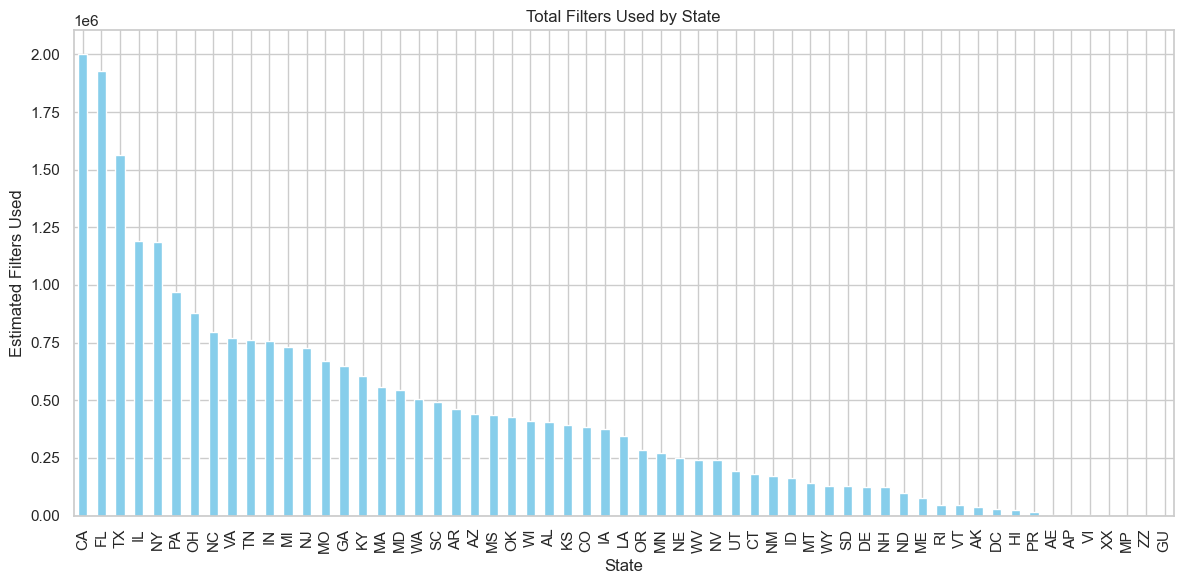

In [6]:
# 📊 Visualize usage by provider state
state_usage = df.groupby('Rfrg_Prvdr_State_Abrvtn')['Filters_Used'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_usage.plot(kind='bar', color='skyblue')
plt.title('Total Filters Used by State')
plt.xlabel('State')
plt.ylabel('Estimated Filters Used')
plt.tight_layout()
plt.show()


🔝 Top 10 States by Filter Usage (KPI)

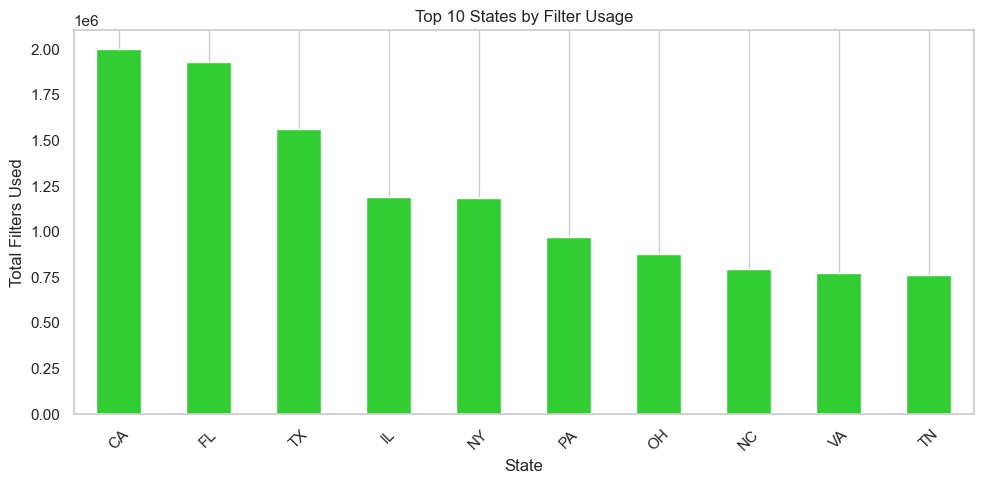

In [7]:
top_states = df.groupby('Rfrg_Prvdr_State_Abrvtn')['Filters_Used'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_states.plot(kind='bar', color='limegreen')
plt.title('Top 10 States by Filter Usage')
plt.xlabel('State')
plt.ylabel('Total Filters Used')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


📊 Boxplot: Filters Used by Provider Specialty (KPI)

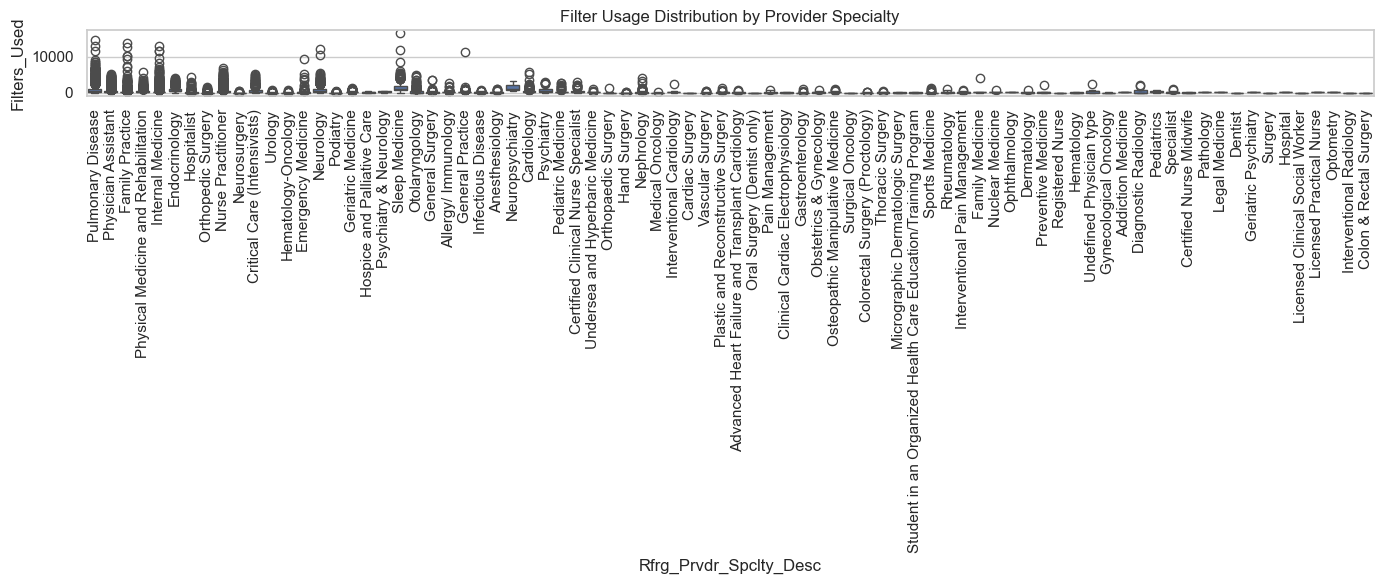

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Rfrg_Prvdr_Spclty_Desc', y='Filters_Used', data=df)
plt.title('Filter Usage Distribution by Provider Specialty')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Summary (KPI)

In [9]:
kpis = {
    'Total Filters Used': df['Filters_Used'].sum(),
    'Average Filters per Provider': df['Filters_Used'].mean(),
    'Max Filters by One Provider': df['Filters_Used'].max(),
    'Min Filters by One Provider': df['Filters_Used'].min(),
    'Number of Providers': df.shape[0]
}

kpi_df = pd.DataFrame.from_dict(kpis, orient='index', columns=['Value'])
kpi_df


,Value
Total Filters Used,2.540311e+07
Average Filters per Provider,4.018590e+02
Max Filters by One Provider,1.646400e+04
Min Filters by One Provider,1.100000e+01
Number of Providers,6.321400e+04


Histogram: Filter Usage Distribution

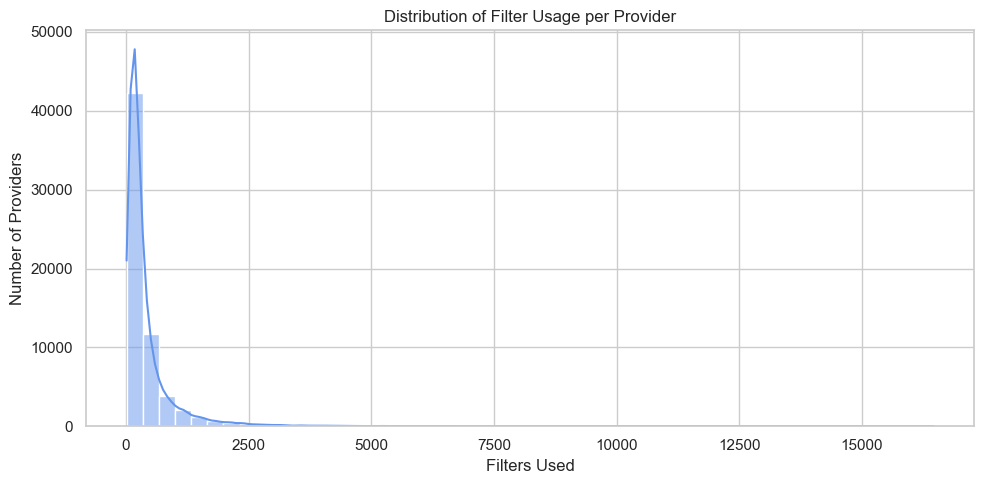

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Filters_Used'], bins=50, kde=True, color='cornflowerblue')
plt.title('Distribution of Filter Usage per Provider')
plt.xlabel('Filters Used')
plt.ylabel('Number of Providers')
plt.tight_layout()
plt.show()


In [11]:
kpi_df.to_csv('../data/filter_usage_kpis.csv')


Data for Forecasting

04:07:32 - cmdstanpy - INFO - Chain [1] start processing
04:07:32 - cmdstanpy - INFO - Chain [1] done processing


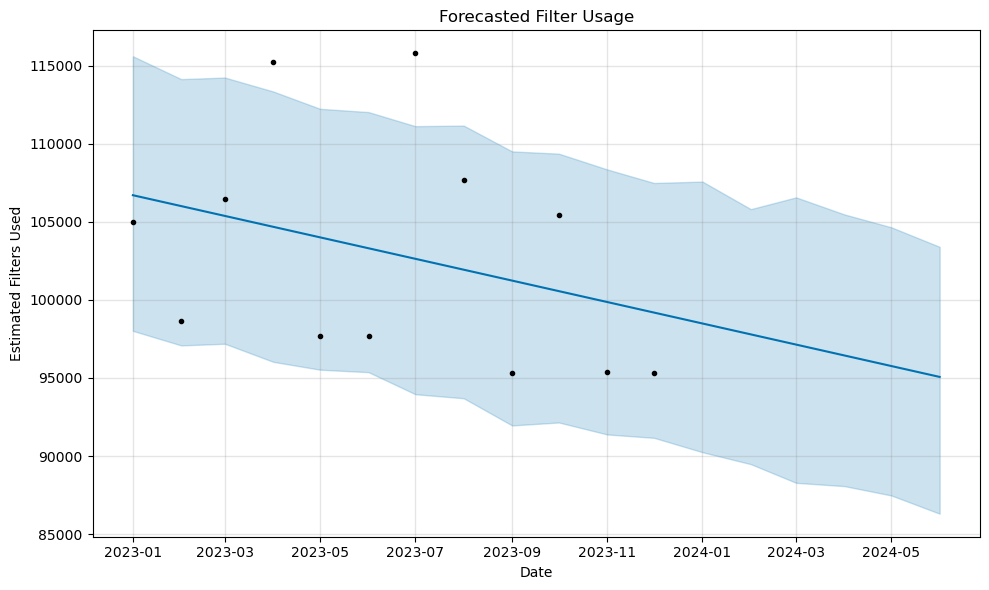

In [3]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulate monthly usage data (e.g. total filters per month)
# Since your dataset is not time-based, we simulate a trend
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='MS')
monthly_usage = pd.DataFrame({
    'ds': months,
    'y': np.random.normal(loc=100000, scale=10000, size=12).astype(int)  # Example: total filters per month
})

# Prophet model
model = Prophet()
model.fit(monthly_usage)

# Forecast next 6 months
future = model.make_future_dataframe(periods=6, freq='MS')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Forecasted Filter Usage")
plt.xlabel("Date")
plt.ylabel("Estimated Filters Used")
plt.grid(True)
plt.tight_layout()
plt.show()


Isolation Forest